In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import urllib.request
import io
import networkx as nx


%matplotlib inline
track_df = pd.read_csv("C://Users//CTurner//Downloads//SpotifyDatasets//tracks.csv")
track_df.shape






(586672, 20)

In [27]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [28]:
track_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [29]:
track_df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [30]:
track_df = track_df.dropna()

In [31]:
track_df.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [32]:
#categories
track_cat = track_df.select_dtypes(include = 'object')
track_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            586601 non-null  object
 1   name          586601 non-null  object
 2   artists       586601 non-null  object
 3   id_artists    586601 non-null  object
 4   release_date  586601 non-null  object
dtypes: object(5)
memory usage: 26.9+ MB


In [33]:
#cardinality
for col in track_cat.columns:
    print(f'{col}: {track_cat[col].nunique()}')
    print('/n')

id: 586601
/n
name: 446474
/n
artists: 114029
/n
id_artists: 115062
/n
release_date: 19698
/n


Text(0.5, 1.0, 'Cardinality')

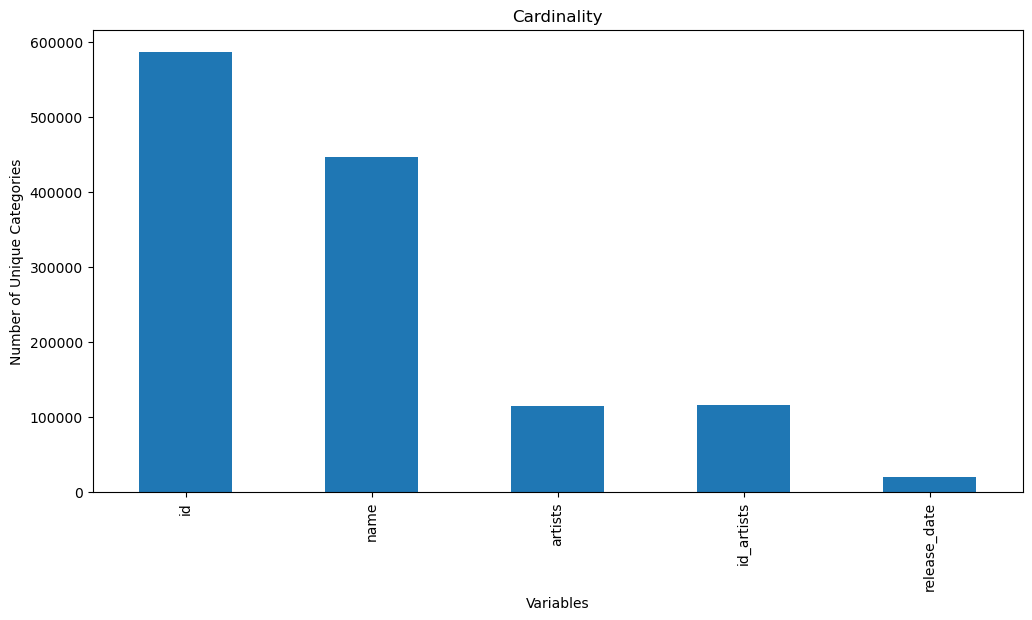

In [34]:
#plot cardinality
track_cat.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of Unique Categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [35]:
#find artists with most songs
prolific_artists = track_df['artists'].value_counts().head(20)
prolific_artists

['Die drei ???']                              3856
['TKKG Retro-Archiv']                         2006
['Benjamin Blümchen']                         1503
['Bibi Blocksberg']                           1472
['Lata Mangeshkar']                           1373
['Bibi und Tina']                              927
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']     905
['Francisco Canaro']                           891
['Ella Fitzgerald']                            870
['Tadeusz Dolega Mostowicz']                   838
['Fünf Freunde']                               812
['Mohammed Rafi']                              787
['Queen']                                      777
['Elvis Presley']                              680
['Frank Sinatra']                              680
['The Rolling Stones']                         654
['Die Originale']                              638
['Billie Holiday']                             609
['Julio Iglesias']                             595
['Globi']                      

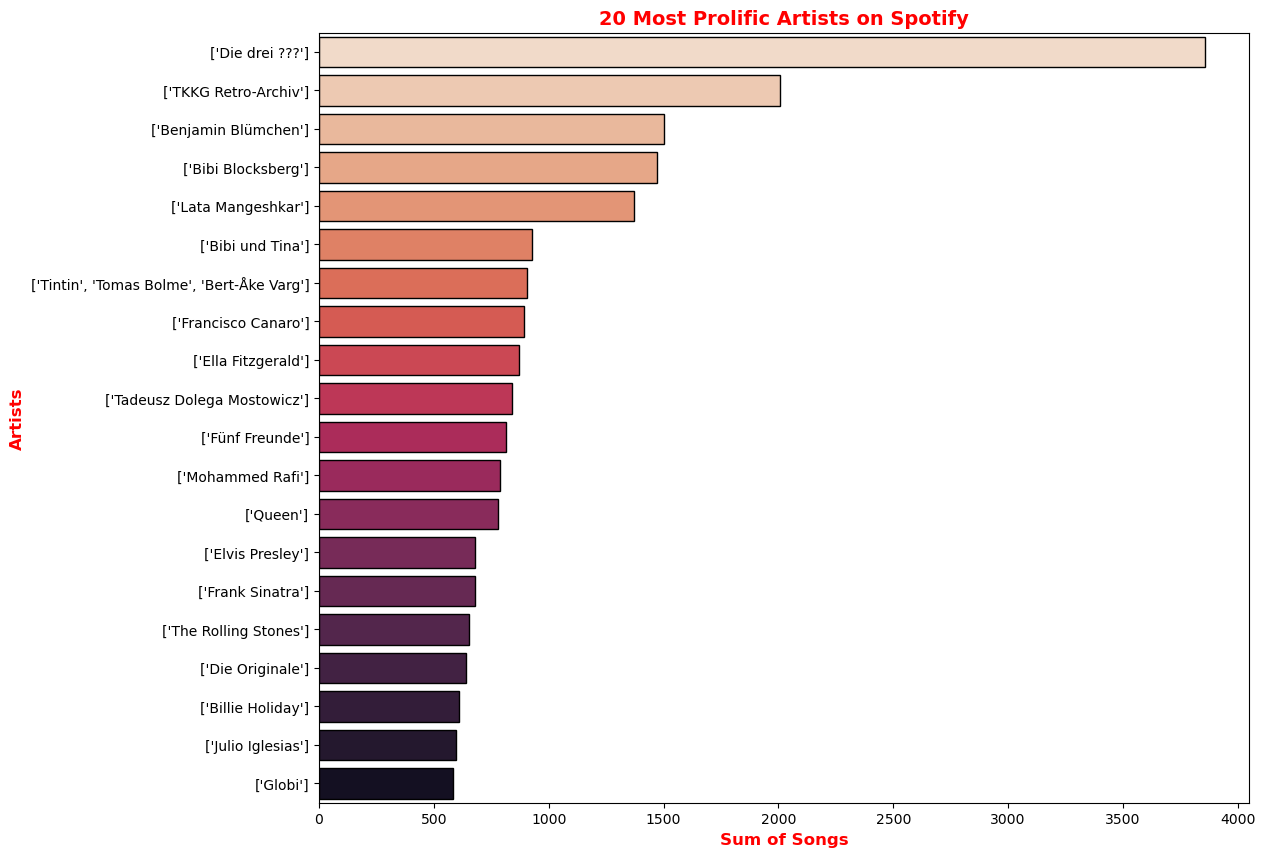

In [36]:
#barplot artists by sum of songs
fig, ax = plt.subplots(figsize = (12,10))
ax = sns.barplot(x = prolific_artists.values, y = prolific_artists.index, palette = 'rocket_r', orient = 'h', edgecolor = 'black', ax = ax)
ax.set_xlabel('Sum of Songs', c = 'r', fontsize = 12, weight = 'bold')
ax.set_ylabel('Artists',c = 'r', fontsize = 12, weight = 'bold')
ax.set_title('20 Most Prolific Artists on Spotify', c= 'r', fontsize = 14, weight = 'bold')
plt.show()

In [37]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

In [38]:
track_df = track_df.sort_values('popularity', ascending = False)

In [39]:
#20 most popular songs
top20 = track_df.head(20)
top20

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
93806,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,94,261667,0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']","['0n6sKrG0xKAf8xmdqeNGke', '3E6xrwgnVfYCrCs0eP...",2021-02-04,0.849,0.701,6,-4.407,0,0.0600,0.40700,0.000000,0.1120,0.505,98.005,4
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4


In [40]:
artist_df =(track_df.groupby(['artists'], as_index=False).mean().groupby('artists')['popularity'].mean().sort_values(ascending=False))

In [41]:
artist_df.head(20)

artists
['Riton', 'Nightcrawlers', 'Mufasa & Hypeman', 'Dopamine']       94.0
['Los Legendarios', 'Wisin', 'Jhay Cortez']                      94.0
['Bad Bunny', 'ROSALÍA']                                         93.0
['Travis Scott', 'HVME']                                         92.0
['Rochy RD', 'Myke Towers', 'Nicki Nicole']                      92.0
['MEDUZA', 'Dermot Kennedy']                                     92.0
['Nathan Evans', '220 KID', 'Billen Ted']                        92.0
['Bad Bunny', 'Jhay Cortez']                                     91.0
['Saweetie', 'Doja Cat']                                         90.0
['Maroon 5', 'Megan Thee Stallion']                              90.0
['Billie Eilish', 'Khalid']                                      89.0
['Powfu', 'beabadoobee']                                         89.0
['Drake', 'Lil Baby']                                            89.0
['Milly', 'Farruko', 'Nio Garcia', 'Jay Wheeler', 'Amenazzy']    88.0
['Sech', 'Da

In [42]:
popular_artists = artist_df.head(20)
popular_artists

artists
['Riton', 'Nightcrawlers', 'Mufasa & Hypeman', 'Dopamine']       94.0
['Los Legendarios', 'Wisin', 'Jhay Cortez']                      94.0
['Bad Bunny', 'ROSALÍA']                                         93.0
['Travis Scott', 'HVME']                                         92.0
['Rochy RD', 'Myke Towers', 'Nicki Nicole']                      92.0
['MEDUZA', 'Dermot Kennedy']                                     92.0
['Nathan Evans', '220 KID', 'Billen Ted']                        92.0
['Bad Bunny', 'Jhay Cortez']                                     91.0
['Saweetie', 'Doja Cat']                                         90.0
['Maroon 5', 'Megan Thee Stallion']                              90.0
['Billie Eilish', 'Khalid']                                      89.0
['Powfu', 'beabadoobee']                                         89.0
['Drake', 'Lil Baby']                                            89.0
['Milly', 'Farruko', 'Nio Garcia', 'Jay Wheeler', 'Amenazzy']    88.0
['Sech', 'Da

In [43]:
#see correlation between any two given features with heatmap
import plotly.graph_objects as go
matrix = track_df.corr()
x_list=['popularity','duration_ms','explict','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']
fig_heatmap = go.Figure(data=go.Heatmap(z=matrix,x=x_list,y=x_list,hoverongaps = False))
fig_heatmap.update_layout(margin=dict(t=200,r=200,b=200,l=200),width=800,height=650,autosize=False)
fig_heatmap.show()

In [44]:
features = ['explicit','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']


In [45]:
df = track_df[features]

In [46]:
df = (df -df.mean()) / df.std()

In [47]:

#create an empty list to store sum of squared distances for each number of clusters
sse = []

#Fit the Kmeans model to the data with a range of different numbers of clusters
for k in range(1, 15):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
#add the sum of squared distances for the current number of clusters to the list
        sse.append(kmeans.inertia_)

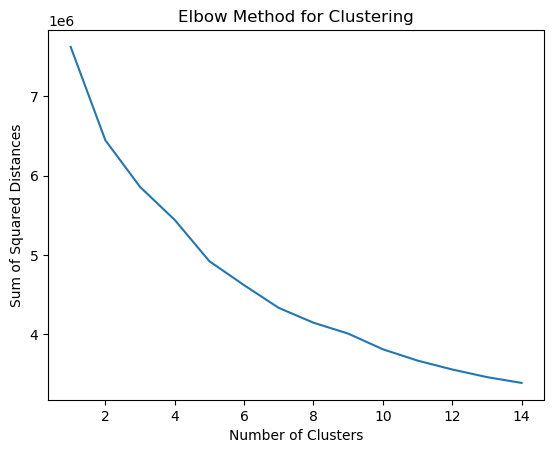

In [48]:
#plot the sum squared distances for each number of clusters for elbow method
plt.plot(range(1,15), sse)
plt.title('Elbow Method for Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [62]:
#Create the KMeans with 14 clusters
kmeans = KMeans(n_clusters=14, random_state=1)
#fit the data
kmeans.fit(df)

KMeans(n_clusters=14, random_state=1)

In [63]:
#Generate the clusters with KMeans via predict() model on the fitted KMeans model
clusters = kmeans.predict(df)

#print the cluster assignments for the first few data points
print(clusters[:10])

[9 9 2 2 9 8 3 2 2 8]


In [ ]:
#Evaluate the quality of the generated clusters
silhouette_score(df, clusters)

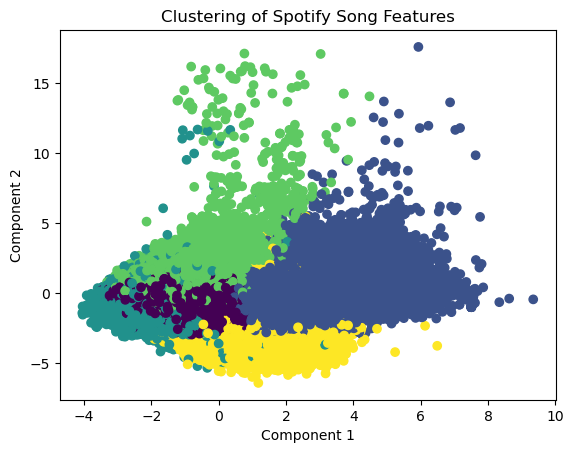

In [61]:
# Visualize the clusters

#create two components
pca= PCA(n_components=2) 
#reduce to two dimensions using PCA
df_2d = pca.fit_transform(df)

#Plot the data points via scatter plot
plt.scatter(df_2d[:, 0],df_2d[:, 1], c=clusters)
plt.title('Clustering of Spotify Song Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:
#Unique cluster assignments
unique_clusters = np.unique(clusters)

#create grid of subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize =(8, 8), sharex=True, sharey=True)

#flatten the array of subplots for easier iteration
axs = axs.flatten()

#iterate over the clusters
for i, cluster in enumerate(unique_clusters):
    #select the data points for current cluster
    df_cluster = df_2d[clusters == cluster]
    
    #Select the data points belonging to other clusters
    df_other_clusters = df_2d[clusters != cluster]
    
    #plot the data points belonging to other clusters in the grey
    axs[i].scatter(df_other_clusters[:,0], df_other_clusters[:,1], c='grey', label='Other Clusters', alpha =0.5)
    
    #plot the data points belonging to the current cluster with a different color
    axs[i].scatter(df_cluster[:, 0], df_cluster[:, 1], c='red', label='Cluster {}'.format(cluster))
    
    #set the x and y labels for the current subplot
    axs[i].set_xlabel('Component 1')
    axs[i].set_ylabel('Component 2')
    
    #add a legend to the current subplot
    axs[i].legend()
    
    plt.show()